In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import statistics as st
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
sns.set(rc={"figure.figsize":(15,6)})
pd.pandas.set_option("display.max_columns",None)

In [2]:
data = pd.read_csv("C:/DS/Concrete_Compressive_Strength_Prediction/notebook/data/concrete_data.csv")

In [3]:
# shabresh@ineuron.ai
data.head()

,cement,blast_furnace_slag,fly_ash,water,superplasticizer,coarse_aggregate,fine_aggregate,age,concrete_compressive_strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [4]:
data.shape

(1030, 9)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   cement                         1030 non-null   float64
 1   blast_furnace_slag             1030 non-null   float64
 2   fly_ash                        1030 non-null   float64
 3   water                          1030 non-null   float64
 4   superplasticizer               1030 non-null   float64
 5   coarse_aggregate               1030 non-null   float64
 6   fine_aggregate                 1030 non-null   float64
 7   age                            1030 non-null   int64  
 8   concrete_compressive_strength  1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB


In [6]:
data.columns

Index(['cement', 'blast_furnace_slag', 'fly_ash', 'water', 'superplasticizer',
       'coarse_aggregate', 'fine_aggregate ', 'age',
       'concrete_compressive_strength'],
      dtype='object')

In [6]:
data.describe()

,cement,blast_furnace_slag,fly_ash,water,superplasticizer,coarse_aggregate,fine_aggregate,age,concrete_compressive_strength
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


In [7]:
# no null value in this data 
data.isnull().sum()

cement                           0
blast_furnace_slag               0
fly_ash                          0
water                            0
superplasticizer                 0
coarse_aggregate                 0
fine_aggregate                   0
age                              0
concrete_compressive_strength    0
dtype: int64

In [8]:
# check duplicate values
data.duplicated().sum()

25

In [9]:
 # drop duplicate values
data.drop_duplicates(inplace=True)

In [10]:
data.shape

(1005, 9)

In [11]:
data.duplicated().sum()

0

In [13]:
data.describe()

,cement,blast_furnace_slag,fly_ash,water,superplasticizer,coarse_aggregate,fine_aggregate,age,concrete_compressive_strength
count,1005.000000,1005.000000,1005.000000,1005.000000,1005.000000,1005.000000,1005.000000,1005.000000,1005.000000
mean,278.631343,72.043483,55.536318,182.075323,6.033234,974.376816,772.688259,45.856716,35.250378
std,104.344261,86.170807,64.207969,21.339334,5.919967,77.579667,80.340435,63.734692,16.284815
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,190.700000,0.000000,0.000000,166.600000,0.000000,932.000000,724.300000,7.000000,23.520000
50%,265.000000,20.000000,0.000000,185.700000,6.100000,968.000000,780.000000,28.000000,33.800000
75%,349.000000,142.500000,118.300000,192.900000,10.000000,1031.000000,822.200000,56.000000,44.870000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


In [14]:
corr = data.corr()

<Axes: >

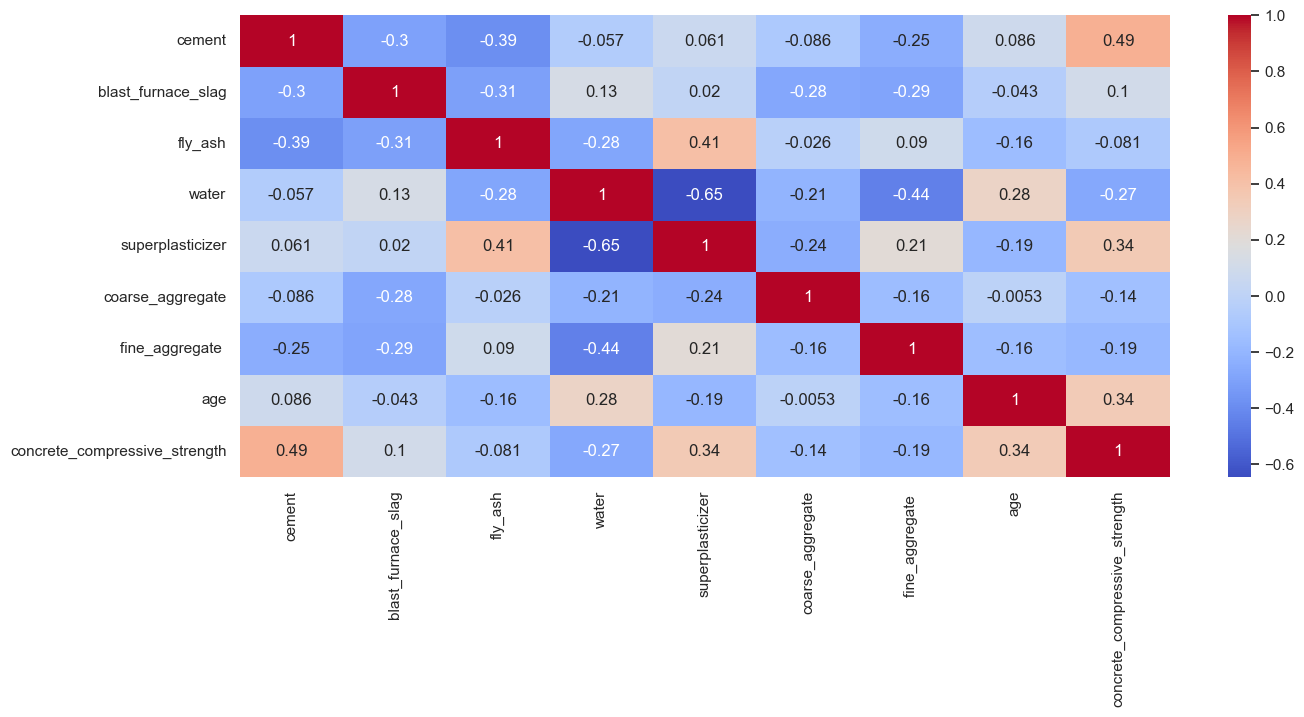

In [15]:
sns.heatmap(corr,annot=True,cbar=True, cmap='coolwarm')

In [16]:

numerical_features = data.dtypes[data.dtypes != "object"].index


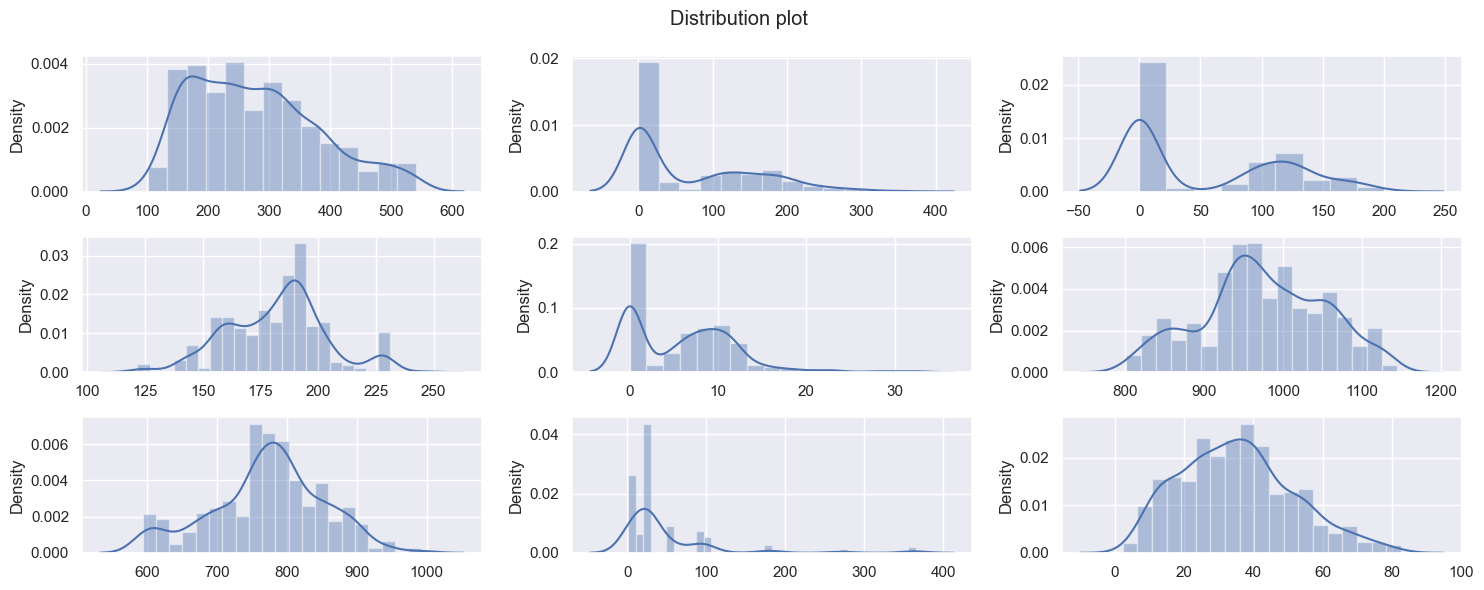

In [17]:
try:
    plt.suptitle("Distribution plot ")
    for i in range(0,len(numerical_features)):
        plt.subplot(3,3,i+1)
        sns.distplot(x=data[numerical_features[i]])
        plt.tight_layout()
except Exception as e:
    print(e)

In [18]:
# saprate indipendent and dependent features 
x = data.iloc[:,:-1]
y = data.iloc[:,-1]

In [19]:
numerical_features = x.select_dtypes(exclude="object").columns

In [21]:
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
## Pipline
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

In [22]:
#numerical pipline
num_pipline = Pipeline(
    steps=[
        ("imputer",SimpleImputer(strategy="median")),
        ("scaler",StandardScaler())
    ]
)

preprocessor = ColumnTransformer([
    ("num_pipline",num_pipline,numerical_features)
])

In [23]:
# perform train test split
from sklearn.model_selection import train_test_split

In [24]:
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.20,random_state=36)

In [25]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(804, 8)
(804,)
(201, 8)
(201,)


In [26]:
X_train = preprocessor.fit_transform(X_train)
X_test = preprocessor.transform(X_test)

In [28]:
from sklearn.linear_model import LinearRegression,Ridge,Lasso,ElasticNet
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

In [29]:
def model_evalution(test,predict):
    mse = mean_squared_error(test,predict)
    mae = mean_absolute_error(test,predict)
    rmse = np.sqrt(mse)
    r2score = r2_score(test,predict)
    return mse,mae,rmse,r2score

In [30]:
models = {
    "LinearRegression":LinearRegression(),
    "Ridge":Ridge(),
    "Lesso":Lasso(),
    "Elastic":ElasticNet(),
    "RandomForestRegressor":RandomForestRegressor(n_estimators=100, random_state=42),
    'xgb_reg': XGBRegressor()

}


In [31]:
model_list = []
r2_list = []
y_predict_list = []
traning_score = []

for i in range(len(models)):
    model = list(models.values())[i]
    #Train Model
    model.fit(X_train,y_train)
    score = model.score(X_train,y_train)
    # Make Prediction
    y_predict = model.predict(X_test)
    
    mse,mae,rmse,r2sore = model_evalution(y_test,y_predict)
    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])
    
    print("Model Traning Performance")
    print("MSE",mse*100)
    print("MAE",mae*100)
    print("RMSE",rmse*100)
    print("R2",r2sore*100)
    print("="*40)
    r2_list.append(r2sore*100)
    y_predict_list.append(y_predict)
    traning_score.append(score)

LinearRegression
Model Traning Performance
MSE 11560.854084512503
MAE 864.0509407615848
RMSE 1075.214122140911
R2 57.68252437492778
Ridge
Model Traning Performance
MSE 11567.598960070629
MAE 865.0593344991889
RMSE 1075.5277290739941
R2 57.657835359311925
Lesso
Model Traning Performance
MSE 12749.552982354811
MAE 927.0831698366802
RMSE 1129.1391846160866
R2 53.33139804228251
Elastic
Model Traning Performance
MSE 15056.460748160578
MAE 1023.3671917894455
RMSE 1227.0477068215635
R2 44.88716784656061
RandomForestRegressor
Model Traning Performance
MSE 3929.105554175812
MAE 401.97218520492817
RMSE 626.8257775630971
R2 85.61785943307476
xgb_reg
Model Traning Performance
MSE 3635.957749244052
MAE 350.4119938333236
RMSE 602.9890338342856
R2 86.69090083633594


In [32]:
r2_list

[57.68252437492778,
 57.657835359311925,
 53.33139804228251,
 44.88716784656061,
 85.61785943307476,
 86.69090083633594]

Text(0, 0.5, 'Predictions')

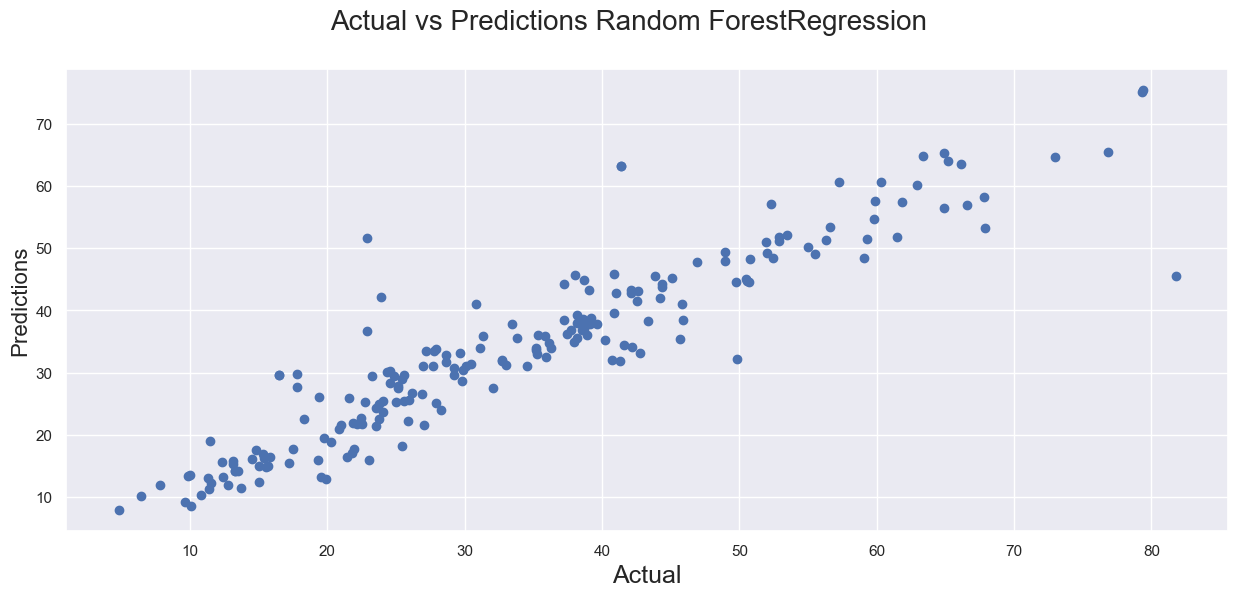

In [33]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_predict_list[4])
fig.suptitle('Actual vs Predictions Random ForestRegression', fontsize=20)              # Plot heading 
plt.xlabel('Actual', fontsize=18)                          # X-label
plt.ylabel('Predictions', fontsize=16) 

In [37]:
xgb = XGBRegressor()
xgb.fit(X_train,y_train)
y_pred = xgb.predict(X_test)
r2_score(y_test,y_pred)

0.8669090083633594

In [38]:
def predicion_system(cem,blastf,flyas,water,superplaster,courseagg,fineagg,age):
    features = np.array([[cem,blastf,flyas,water,superplaster,courseagg,fineagg,age]])
    prediction = xgb.predict(features).reshape(1,-1)
    
    return prediction[0]

In [39]:
cem = 158.60
blastf = 148.90
flyas = 116.00
water = 175.10
superplaster = 15.00
courseagg = 953.3
fineagg = 719.70
age = 28

prediction = predicion_system(cem,blastf,flyas,water,superplaster,courseagg,fineagg,age)
print("strength is : ",prediction)

strength is :  [44.45415]
